<a href="https://colab.research.google.com/github/HikmahAlBaity/Wisdom/blob/main/Project2_1__Dr_Obay_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/breast-cancer-wisconsin.data 2.txt', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
data.columns = col_names
data.head(10)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [ ]:
data.drop('Id', axis = 1, inplace = True)
data.head()


,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
# convert a feature to numeric

data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors= 'coerce') #
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
data.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
data['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [ ]:
# convert missing value using median because the data distribution have outliers , not suitable to use mode or mean

data['Bare_Nuclei'].replace(np.nan , data['Bare_Nuclei'].median(), inplace = True)
data.isnull().sum()


Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
data['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

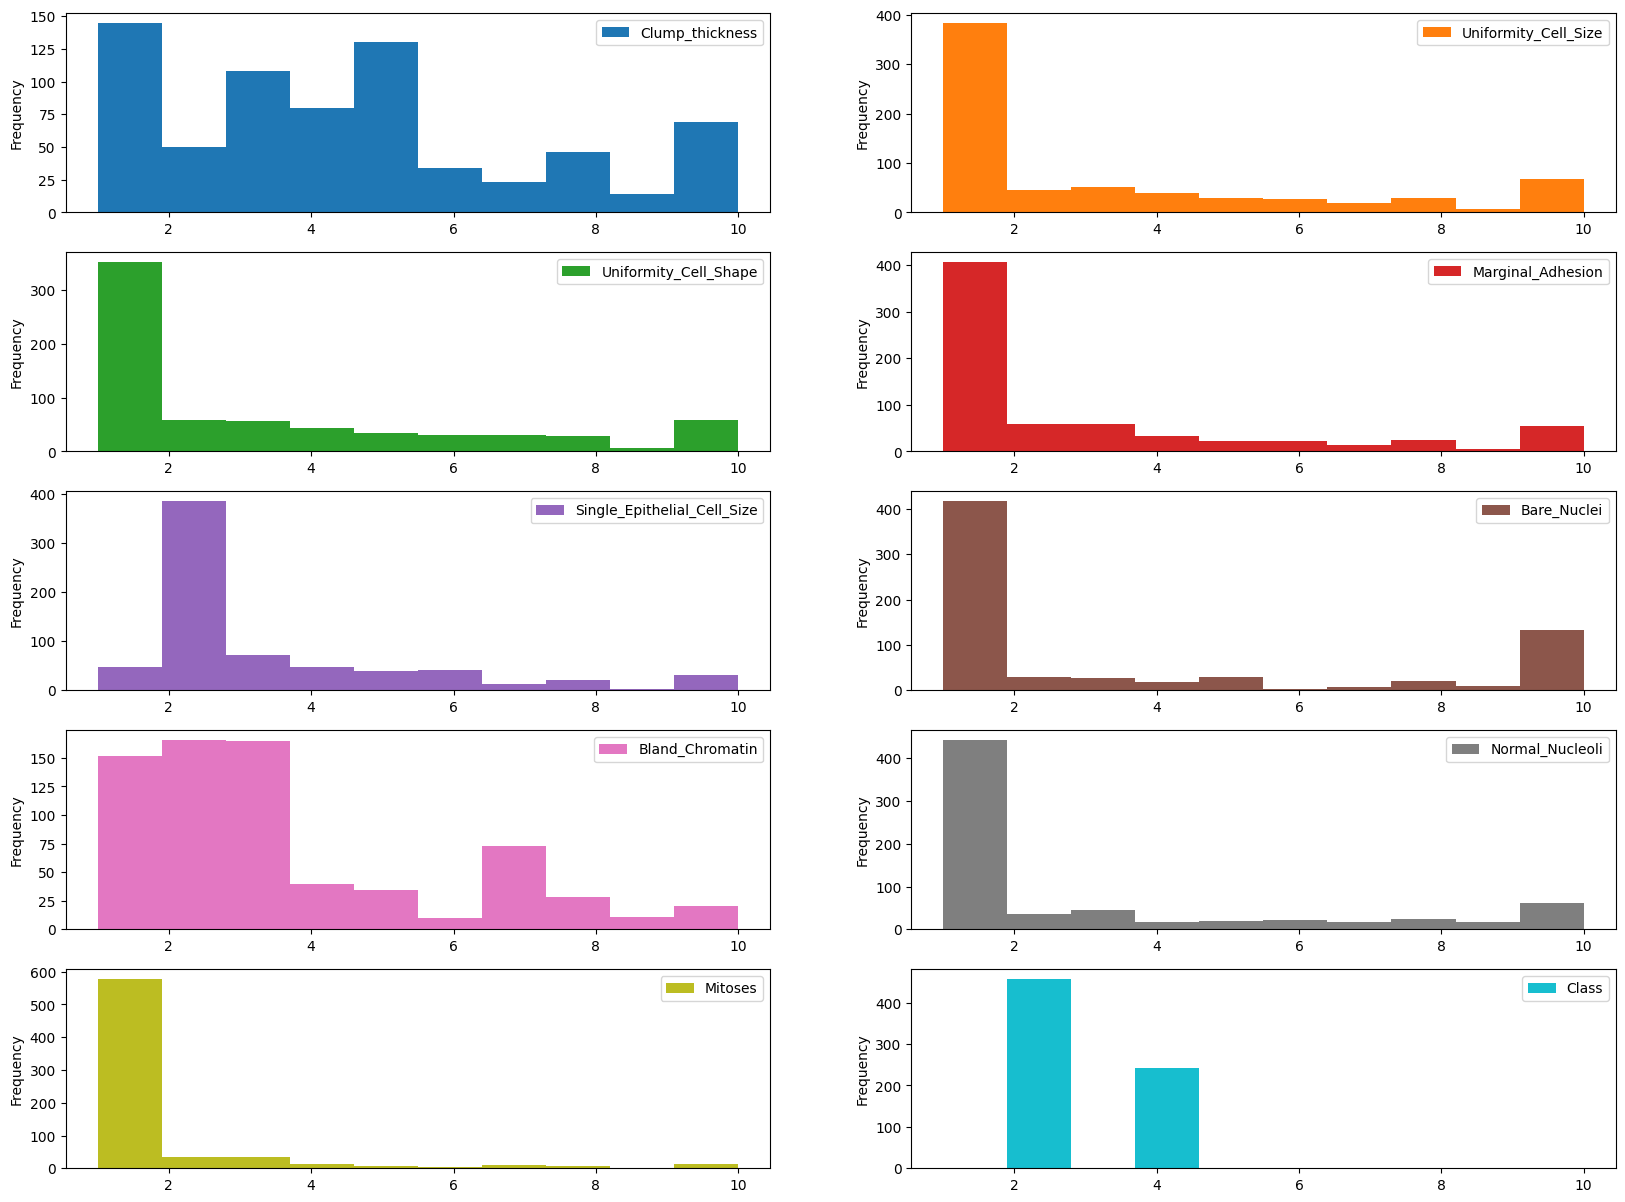

In [ ]:
# histogram
plt.rcParams['figure.figsize'] = (20, 15)
data.plot(kind = 'hist', bins = 10, subplots = True, layout = (5,2), sharex = False, sharey= False )

plt.show()

In [ ]:
data.corr()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [ ]:
correlations = data.corr()
correlations['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.818968
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

In [ ]:
X= data.drop('Class', axis = 1)
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 12)
X_train.shape

(559, 9)

In [ ]:
# data normalisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.85238741, -0.6892289 , -0.73337035, -0.27551667, -0.54852159,
        -0.683798  , -0.14528677, -0.59736735, -0.33739556],
       [ 1.98805708,  2.36047258,  2.4040329 ,  0.44585953,  2.2731677 ,
        -0.683798  ,  1.9807683 ,  2.47559291, -0.33739556],
       [-1.20744298, -0.6892289 , -0.73337035, -0.63620477, -0.54852159,
        -0.683798  , -0.14528677, -0.59736735, -0.33739556],
       [ 1.98805708,  2.02161686,  1.35823182,  0.08517143,  0.39204151,
        -0.40335554,  1.55555728,  1.45127282, -0.33739556],
       [ 1.98805708,  0.32733826,  0.31243074,  2.60998814, -0.54852159,
         1.84018421,  0.70513526,  0.08551271,  0.90751612]])

In [ ]:
from sklearn. neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier() # default N=5

# training
neigh.fit(X_train, y_train)

# prediction
y_hat = neigh.predict(X_test)

# evaluate
print ('The accuracy is : ', (accuracy_score( y_test, y_hat))*100)

The accuracy is :  98.57142857142858


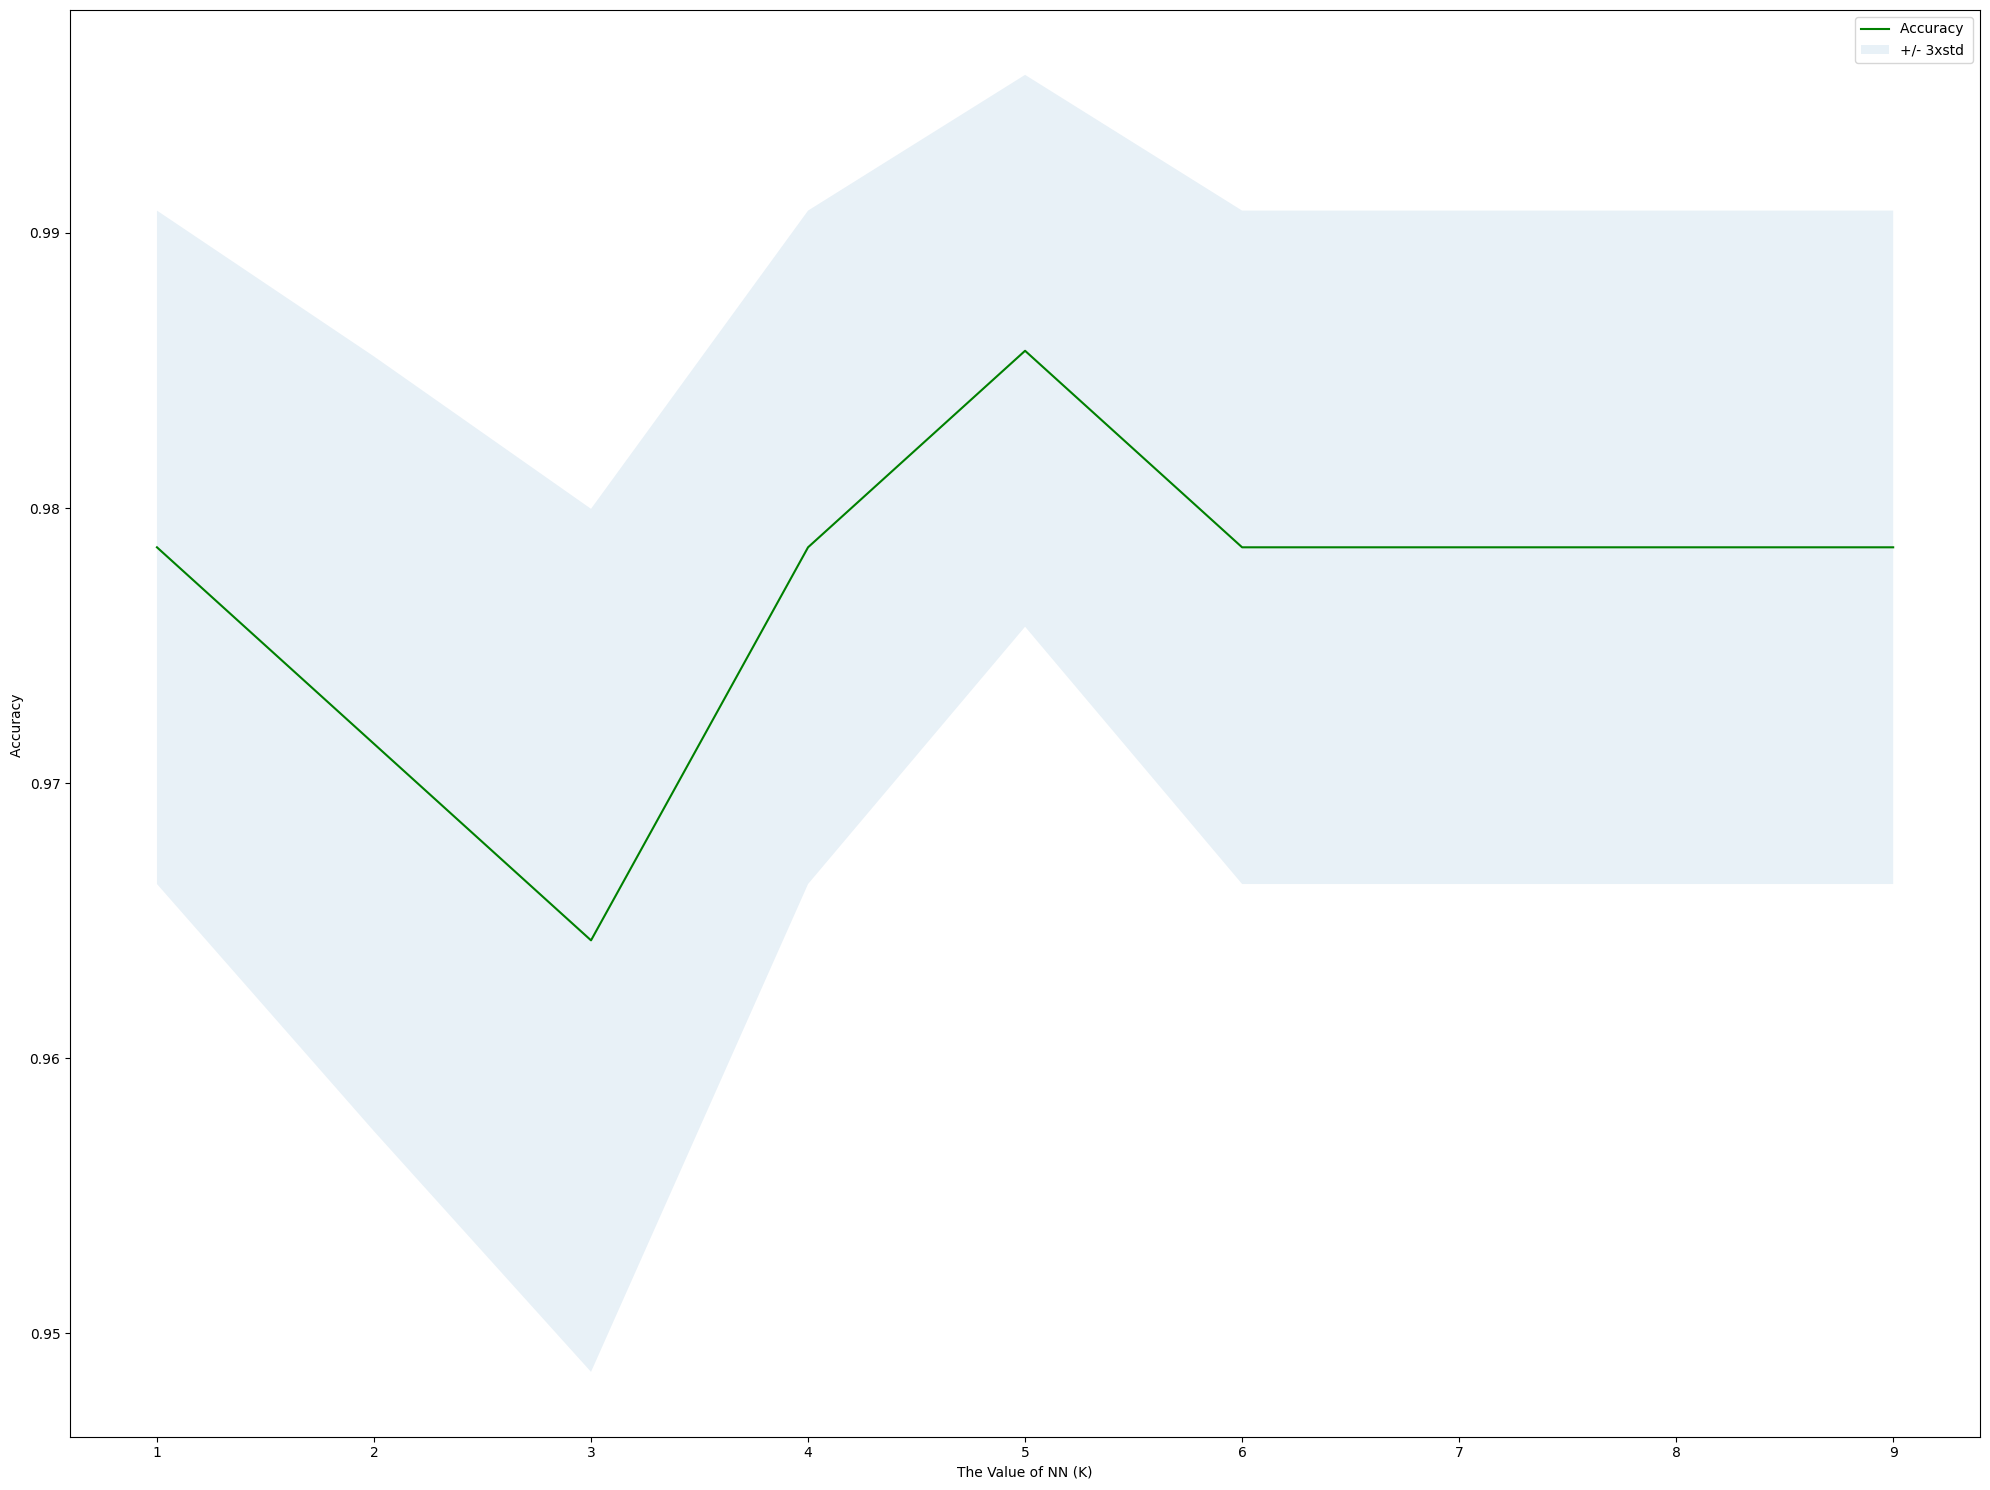



The best accuracy was with 0.9857142857142858 with k= 5


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)

    # evaluate the training
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_hat)

print('The confusion_matrix is:',cm )
print('')
print('TP is : ', cm [0, 0])
print('TN is : ', cm [1, 1])
print('FP is : ', cm [0, 1])
print('FN is : ', cm [1, 0])

The confusion_matrix is: [[87  2]
 [ 0 51]]

TP is :  87
TN is :  51
FP is :  2
FN is :  0


The correct prediction is TP and TN, which means 94 +42 =136, and the incorrect prediction is FP and FN, which means 1+3 = 4.

**Check the over fitting **
- at training set, the accuracy is good, while in test set, low accuracy.

In [ ]:
print ('The accuracy of the training set is', neigh.score(X_train, y_train))
print ('The accuracy of the test set is', neigh.score(X_test, y_test))

The accuracy of the training set is 0.9695885509838998
The accuracy of the test set is 0.9785714285714285


In [ ]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        89
           4       0.96      1.00      0.98        51

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140



**Precision** : is the relationship of correctly predicted positive (TP) to the total prediction of positive (TP+FP) - HOW WELL THE MODEL TO GET THE RIGHT ANSWER

**Recall:** is the relationship of correctly predicted positive (TP) to the true total prediction (TP+FN) # -HOW GOOD IN RECALLING THE GOOD ANSWER